# Introduction

This analysis is to use the supply chain dataset to find out any possible problems with suppliers or any shortage with an inventory. Question to help analysis:

* How many suppliers

* How many number of types of products are supplied by each suppliers

* How many products have failed in inspection and who is the supplier

* How many products are below their sheir stocks levels

* Is a one-time order enough for those products to reach their stock level

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('supply_chain_data.csv')

In [3]:
df.head()

,Product_type,SKU,Price,Availability,Number_of_products sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product_type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number_of_products sold  100 non-null    int64  
 5   Revenue_generated        100 non-null    float64
 6   Customer_demographics    100 non-null    object 
 7   Stock_levels             100 non-null    int64  
 8   Lead_times               100 non-null    int64  
 9   Order_quantities         100 non-null    int64  
 10  Shipping_times           100 non-null    int64  
 11  Shipping_carriers        100 non-null    object 
 12  Shipping_costs           100 non-null    float64
 13  Supplier_name            100 non-null    object 
 14  Location                 10

In [5]:
df.describe()

,Price,Availability,Number_of_products sold,Revenue_generated,Stock_levels,Lead_times,Order_quantities,Shipping_times,Shipping_costs,Lead_time,Production_volumes,Manufacturing_lead time,Manufacturing_costs,Defect_rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239830,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976920,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [6]:
df.describe(include =['O'])

,Product_type,SKU,Customer_demographics,Shipping_carriers,Supplier_name,Location,Inspection_results,Transportation_modes,Routes
count,100,100,100,100,100,100,100,100,100
unique,3,100,4,3,5,5,3,4,3
top,skincare,SKU0,Unknown,Carrier B,Supplier 1,Kolkata,Pending,Road,Route A
freq,40,1,31,43,27,25,41,29,43


In [7]:
#cleaning dataset

df.isnull().sum()

Product_type               0
SKU                        0
Price                      0
Availability               0
Number_of_products sold    0
Revenue_generated          0
Customer_demographics      0
Stock_levels               0
Lead_times                 0
Order_quantities           0
Shipping_times             0
Shipping_carriers          0
Shipping_costs             0
Supplier_name              0
Location                   0
Lead_time                  0
Production_volumes         0
Manufacturing_lead time    0
Manufacturing_costs        0
Inspection_results         0
Defect_rates               0
Transportation_modes       0
Routes                     0
Costs                      0
dtype: int64

In [8]:
df.duplicated().sum()

0

The supply chain dataset has no missing values no dupplicate value

# Explore Data

[Text(0, 0, '241628')]

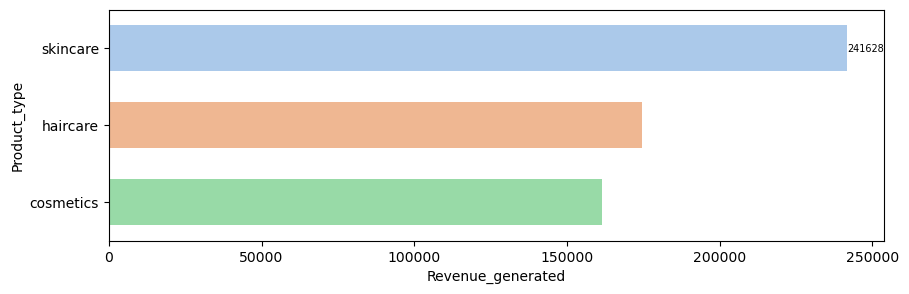

In [9]:
# total revenue in each product type

tr = df[['Product_type', 'Revenue_generated',]].groupby(['Product_type'],as_index = False).sum()
tr_sorted = tr.sort_values(by=['Revenue_generated'],ascending=False)

fig, ax = plt.subplots(figsize = (10,3))
sns.barplot(tr_sorted, x='Revenue_generated', y='Product_type',width = .6,palette='pastel')
ax.bar_label(ax.containers[0],fontsize=7)

[Text(0, 0, '25')]

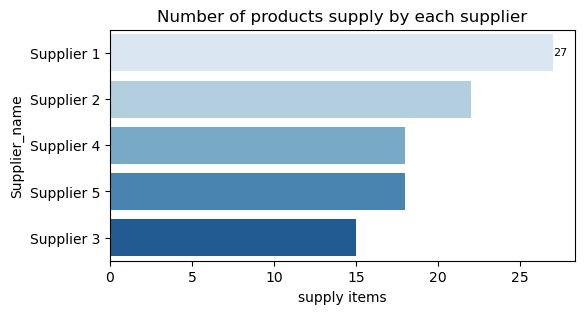

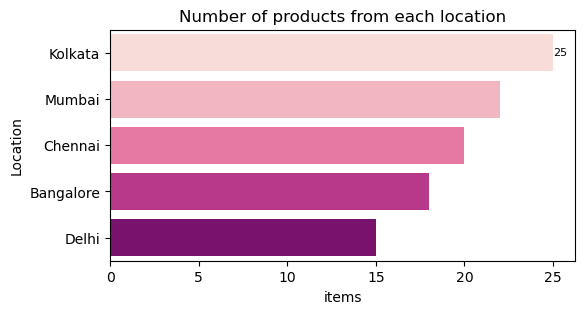

In [12]:
# products supply by each supplier
suppliers = df[['Supplier_name']].value_counts().to_frame('supply items').reset_index()
suppliers_sorted = suppliers.sort_values(by='supply items',ascending=False)

fig, ax1 = plt.subplots(figsize=(6, 3))
sns.barplot(suppliers_sorted,y='Supplier_name', x='supply items',ax=ax1,palette='Blues')
ax1.set_title('Number of products supply by each supplier')
ax1.bar_label(ax1.containers[0],fontsize=8)

# products from each location
locations = df[['Location']].value_counts().to_frame('items').reset_index()
locations_sorted = locations.sort_values(by='items',ascending=False)

fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(locations_sorted,y='Location', x='items', ax=ax, palette='RdPu')
ax.set_title('Number of products from each location')
ax.bar_label(ax.containers[0],fontsize=8)

* The biggest supplier is Supplier 1, that supplies over one quarter type of products.

* One quarter types of products from kolkata.

In [13]:
#product have failed in inspection
fail = df.loc[df['Inspection_results']=='Fail']
fail_s = fail[['Supplier_name']].value_counts().to_frame('fail count').reset_index()
fail_s = pd.merge(fail_s, suppliers,on='Supplier_name')
fail_s['fail rate']= fail_s['fail count']/fail_s['supply items']
fail_s.sort_values(by='fail rate',ascending = False)

,Supplier_name,fail count,supply items,fail rate
0,Supplier 4,12,18,0.666667
2,Supplier 5,7,18,0.388889
1,Supplier 2,8,22,0.363636
3,Supplier 1,6,27,0.222222
4,Supplier 3,3,15,0.200000


Supplier 4 has 12 of 18 supply goods failed in inspction result with 66.7% of fail rate.

In [15]:
# products below stock levels
need_order = df.loc[df['Availability']<df['Stock_levels']]
need_order

,Product_type,SKU,Price,Availability,Number_of_products sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
10,skincare,SKU10,15.707796,11,996,2330.965802,Non-binary,51,13,80,...,Kolkata,18,830,5,96.527353,Pass,1.727314,Road,Route B,806.103178
12,haircare,SKU12,71.213389,41,336,2873.741446,Unknown,100,30,85,...,Kolkata,3,563,3,32.321286,Fail,2.161254,Road,Route B,402.968789
13,skincare,SKU13,16.160393,5,249,4052.738416,Male,80,8,48,...,Bangalore,23,173,10,97.829050,Pending,1.631074,Road,Route B,547.241005
14,skincare,SKU14,99.171329,26,562,8653.570926,Non-binary,54,29,78,...,Kolkata,25,558,14,5.791437,Pending,0.100683,Air,Route B,929.235290
20,skincare,SKU20,96.341072,22,320,8128.027697,Unknown,27,12,68,...,Chennai,29,309,6,65.686260,Pass,4.231417,Air,Route B,493.871215
21,cosmetics,SKU21,84.893869,60,601,7087.052696,Unknown,69,25,7,...,Chennai,19,791,4,61.735729,Pending,0.018608,Air,Route C,523.360915
22,haircare,SKU22,27.679781,55,884,2390.807867,Unknown,71,1,63,...,Kolkata,22,780,28,50.120840,Fail,2.591275,Rail,Route C,205.571996


In [22]:
# below stock levels but fail in inspection
need_order_f = df.loc[(df['Availability']<df['Stock_levels'])&(df['Inspection_results']=='Fail')]
print('Need to order but fail in inspection:',need_order_f.shape[0])

# below stock levels but pending in inspection
need_order_Pending = df.loc[(df['Availability']<df['Stock_levels'])&(df['Inspection_results']=='Pending')]
print('Need to order but pending in inspection:',need_order_Pending.shape[0])

# below stock levels and pass in inspection
need_order_Pass = df.loc[(df['Availability']<df['Stock_levels'])&(df['Inspection_results']=='Pass')]
print('Need to order and pass in inspection:',need_order_Pass.shape[0])

Need to order but fail in inspection: 15
Need to order but pending in inspection: 23
Need to order and pass in inspection: 13


There are 51 items are below their stock levels and need to order.

* 15 of items still have fail in inspection results.

* 23 of them are pending in inspection results.

In [26]:
#Still cannot reach stock level
not_enough_Pass = need_order_Pass.loc[(df['Availability']+df['Order_quantities'])<df['Stock_levels']]
not_enough_Pass

,Product_type,SKU,Price,Availability,Number_of_products sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
26,haircare,SKU26,97.446947,9,353,3716.493326,Male,59,16,48,...,Bangalore,26,171,4,15.972230,Pass,2.119320,Rail,Route A,617.866917
45,haircare,SKU45,33.784138,1,24,5267.956808,Male,93,7,52,...,Chennai,25,794,25,66.312544,Pass,3.219605,Rail,Route A,495.305697
49,cosmetics,SKU49,78.897913,19,99,8001.613207,Unknown,97,24,9,...,Delhi,28,177,28,14.147815,Pass,2.825814,Rail,Route A,336.890169
77,haircare,SKU77,57.449743,14,359,2483.760178,Unknown,96,28,57,...,Kolkata,26,334,5,42.952445,Pass,3.055142,Road,Route B,852.568099
92,cosmetics,SKU92,47.714233,44,276,2100.129755,Male,90,25,10,...,Mumbai,4,671,29,62.612690,Pass,0.333432,Rail,Route B,230.092782


Even through 13 of need to order goods pass the inspection,but still have 5 of them cannot reach stock levels with a one time order.

# Suggestion

1.Failed inspection products problem

* Informing the supervisor about the failed inspection of products

* And addressing the concern about the quality issue of supplier 4

2.Need more data to find issues and further questions for the order quantities problem

* Could it be a long lead time or manufacturing lead time(transportation or route)

* Could those products had issues in inspection before

* Could be just needed to adjust the number of order quantities